In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato.csv',  encoding = 'ISO-8859-1',  low_memory = False, nrows = 25000)
df

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
24995  https://www.zomato.com/bangalore/teapoy-mutiny...   
24996  https://www.zomato.com/bangalore/patio-the-res...   
24997  https://www.zomato.com/bangalore/sufi-restaura...   
24998  https://www.zomato.com/bangalore/bhagini-banas...   
24999  https://www.zomato.com/bangalore/donne-biriyan...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
24995  117/1, Near Shilpa Bakery, Horamavu - Agara Ma...   
24996  544, 3rd Main, 4th Cross, OMBR Layout, Banaswa...   
24997  653,/2, Annaiah Reddy Layout, 100 Feet Road, B...   
24998  1253, Near Horamavu Signal, Outer Ring Road, D...   
24999  4C/1008, 1st Block, HRBR Layout, Horamavu Sign...   

                         name online_order book_table   rate  votes  \
0                       Jalsa          Yes        Yes  4.1/5    775   
1              Spice Elephant          Yes         No  4.1/5    787   
2             San Churro Cafe          Yes         No  3.8/5    918   
3       Addhuri Udupi Bhojana           No         No  3.7/5     88   
4               Grand Village           No         No  3.8/5    166   
...                       ...          ...        ...    ...    ...   
24995           Teapoy Mutiny          Yes         No  4.1/5     98   
24996  Patio - The Resto Cafe          Yes         No  3.7/5     73   
24997  Sufi Restaurant & Cafe          Yes         No  3.7/5    105   
24998                 Bhagini          Yes         No  2.3/5    119   
24999     Donne Biriyani Mane           No         No  3.8/5    161   

                                  phone      location            rest_type  \
0        080 42297555\r\n+91 9743772233  Banashankari        Casual Dining   
1                          080 41714161  Banashankari        Casual Dining   
2                        +91 9663487993  Banashankari  Cafe, Casual Dining   
3                        +91 9620009302  Banashankari          Quick Bites   
4      +91 8026612447\r\n+91 9901210005  Basavanagudi        Casual Dining   
...                                 ...           ...                  ...   
24995                    +91 9686566069        Hennur                 Cafe   
24996                    +91 9980477430     Banaswadi    Cafe, Quick Bites   
24997  +91 7676243366\r\n+91 7760177991     Banaswadi        Casual Dining   
24998    080 25427999\r\n+91 9886120888     Banaswadi        Casual Dining   
24999    +91 7676691691\r\n080 41691691     Banaswadi          Quick Bites   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                            Masala Dosa   
4                                    Panipuri, Gol Gappe   
...                                                  ...   
24995  Tea, Sandwiches, Coffee, French Fries, Cheese ...   
24996         Chicken Burger, Pasta, Hash Brown, Noodles   
24997                                                NaN   
24998                                                NaN   
24999  Pepper Chicken, Donne Biryani, Chicken Biryani...   

                                          cuisines  \
0                   North Indian, Mughlai, Chi

In [3]:
df.shape

(25000, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            3717
votes                              0
phone                            500
location                           4
rest_type                        108
dish_liked                     13852
cuisines                          18
approx_cost(for two people)       90
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          25000 non-null  object
 1   address                      25000 non-null  object
 2   name                         25000 non-null  object
 3   online_order                 25000 non-null  object
 4   book_table                   25000 non-null  object
 5   rate                         21283 non-null  object
 6   votes                        25000 non-null  int64 
 7   phone                        24500 non-null  object
 8   location                     24996 non-null  object
 9   rest_type                    24892 non-null  object
 10  dish_liked                   11148 non-null  object
 11  cuisines                     24982 non-null  object
 12  approx_cost(for two people)  24910 non-null  object
 13  reviews_list                 25

In [7]:
df.describe()

votes
count  25000.000000
mean     252.131920
std      703.602855
min        0.000000
25%        6.000000
50%       39.000000
75%      183.000000
max    16345.000000

In [8]:
#droping null values
df.dropna(axis=0,subset=['location'],inplace=True)

In [9]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            3713
votes                              0
phone                            496
location                           0
rest_type                        104
dish_liked                     13848
cuisines                          14
approx_cost(for two people)       86
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
len(df['location'].unique())

84

In [11]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [12]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

# Geospatial Analysis:

In [13]:
geolocator=Nominatim(user_agent="app")

In [14]:
lat=[]
lon=[]
for location in locations['Name']:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [15]:
locations['lat']=lat
locations['lon']=lon

In [16]:
locations.head()

Name        lat        lon
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [17]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [18]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                BTM   2420
1           JP Nagar   2209
2          Jayanagar   1683
3                HSR   1534
4  Bannerghatta Road   1533

In [19]:
print(locations.shape)
print(Rest_locations.shape)

(84, 3)
(84, 2)


In [20]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count        lat         lon
0                BTM   2420  45.954851 -112.496595
1           JP Nagar   2209  12.265594   76.646540
2          Jayanagar   1683  27.643927   83.052805
3                HSR   1534  18.147500   41.538889
4  Bannerghatta Road   1533  12.887979   77.597081

In [21]:
Restaurant_locations['count'].max()

2420

In [22]:
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [23]:
basemap=generateBaseMap()

In [24]:
basemap

In [25]:
Restaurant_locations[['lat','lon','count']]

lat         lon  count
0   45.954851 -112.496595   2420
1   12.265594   76.646540   2209
2   27.643927   83.052805   1683
3   18.147500   41.538889   1534
4   12.887979   77.597081   1533
..        ...         ...    ...
79  13.078474   77.606894      2
80  13.038218   77.591900      2
81  13.010129   77.554801      2
82  12.984671   77.679091      1
83  13.007516   77.695935      1

[83 rows x 3 columns]

In [26]:
HeatMap(Restaurant_locations[['lat','lon','count']],zoom=20,radius=15).add_to(basemap)

In [27]:
basemap

In [28]:
FastMarkerCluster(data=Restaurant_locations[['lat','lon','count']].values.tolist()).add_to(basemap)

basemap

In [29]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5'], dtype=object)

In [30]:
df.dropna(axis=0,subset=['rate'],inplace=True)

In [31]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5'], dtype=object)

In [32]:
def split(x):
    return x.split('/')[0]

In [33]:
df['rating']=df['rate'].apply(split)
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 '], dtype=object)

In [34]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)

In [35]:
df['rating']=pd.to_numeric(df['rating'])
df.groupby(['location'])['rating'].mean().sort_values(ascending=False)

location
Koramangala 3rd Block    4.058333
St. Marks Road           4.027815
Lavelle Road             4.025571
Kaggadasapura            4.000000
Church Street            3.965854
                           ...   
North Bangalore          2.233333
Rajajinagar              0.000000
Sanjay Nagar             0.000000
New BEL Road             0.000000
Hebbal                   0.000000
Name: rating, Length: 79, dtype: float64

In [36]:
df.groupby(['location'])['rating'].mean()

location
BTM                              3.284946
Banashankari                     3.398872
Banaswadi                        3.349444
Bannerghatta Road                3.260208
Basavanagudi                     3.469828
                                   ...   
Varthur Main Road, Whitefield    3.207500
Vasanth Nagar                    3.493130
Vijay Nagar                      2.450000
Whitefield                       3.187572
Wilson Garden                    3.180597
Name: rating, Length: 79, dtype: float64

In [37]:
avg_rating=df.groupby(['location'])['rating'].mean().values

In [38]:
loc=df.groupby(['location'])['rating'].mean().index

In [39]:
geolocator=Nominatim(user_agent="app")

In [40]:
lat=[]
lon=[]
for location in loc:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [41]:
rating=pd.DataFrame()
rating['location']=loc
rating['lat']=lat
rating['lon']=lon
rating['avg_rating']=avg_rating

In [42]:
rating.head()


location        lat         lon  avg_rating
0                BTM  45.954851 -112.496595    3.284946
1       Banashankari  15.887678   75.704678    3.398872
2          Banaswadi  13.014162   77.651854    3.349444
3  Bannerghatta Road  12.887979   77.597081    3.260208
4       Basavanagudi  12.941726   77.575502    3.469828

In [43]:
rating.isna().sum()

location      0
lat           1
lon           1
avg_rating    0
dtype: int64

In [44]:
rating=rating.dropna()

In [45]:
HeatMap(rating[['lat','lon','avg_rating']],zoom=20,radius=15).add_to(basemap)
basemap

In [46]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table   rate  votes                             phone  \
5           Yes         No  3.8/5    286  +91 9980040002\r\n+91 9980063005   
50           No         No  3.7/5     21                    +91 8026893211   
72           No         No      0      0                    +91 8050884222   
87           No         No  3.5/5     31  +91 8892752997\r\n+91 7204780429   
94           No         No  2.6/5    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

   approx_cost(for two people)  \
5                          600   
50                         450   
72                         150   
87                         200   
94                         600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  rating  
5           Buffet    Banashankari     3.8  
50        Delivery    Banashankari     3.7  
72        Delivery    Banashankari     0.0  
87        Delivery    Banashankari     3.5  
94        Delivery    Banashankari     2.6

In [47]:
north_india=df2.groupby('location')['url'].count().reset_index()
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    146
1       Banashankari     35
2          Banaswadi      2
3  Bannerghatta Road     52
4       Basavanagudi     15

In [48]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [49]:
basemap=generateBaseMap()
HeatMap(north_india[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

In [50]:
def Heatmap_Zone(zone):
    df3=df[df['cuisines']==zone]
    df_zone=df3.groupby(['location'],as_index=False)['url'].agg('count')
    df_zone.columns=['Name','count']
    df_zone=df_zone.merge(locations,on="Name",how='left').dropna()
    basemap=generateBaseMap()
    HeatMap(df_zone[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
    return basemap

In [51]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'Continental, North Indian, South Indian, Italian',
       'Continental, American, Indonesian, Asian, Thai',
       'American, Mexican, BBQ'], dtype=object)

In [52]:
Heatmap_Zone('South Indian')

In [53]:
Heatmap_Zone('Italian')

In [54]:
df.shape

(21283, 18)

In [55]:
df2=df.copy()


In [56]:
# df.isnull().sum()
# df.dropna(how='any',inplace=True)
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'rating'],
      dtype='object')

In [57]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
df['cost'] = df['cost'].astype(float)

In [58]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [59]:
df.shape

(21283, 18)

In [60]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes','rating'])]:
        data[column] = data[column].factorize()[0]
    return data

Zom_df = Encode(df.copy())
Zom_df

url  address  name  online_order  book_table   rate  votes  phone  \
0          0        0     0             0           0  4.1/5    775      0   
1          1        1     1             0           1  4.1/5    787      1   
2          2        2     2             0           1  3.8/5    918      2   
3          3        3     3             1           1  3.7/5     88      3   
4          4        4     4             1           1  3.8/5    166      4   
...      ...      ...   ...           ...         ...    ...    ...    ...   
24995  21278     6904  5425             0           1  4.1/5     98   7981   
24996  21279     6905  5426             0           1  3.7/5     73   7982   
24997  21280     7119  5548             0           1  3.7/5    105   8483   
24998  21281     7081  1872             0           1  2.3/5    119   8484   
24999  21282     7238   855             1           1  3.8/5    161   8313   

       location  rest_type  dish_liked  cuisines   cost  reviews_list  \
0             0          0           0         0  800.0             0   
1             0          0           1         1  800.0             1   
2             0          1           2         2  800.0             2   
3             0          2           3         3  300.0             3   
4             1          0           4         4  600.0             4   
...         ...        ...         ...       ...    ...           ...   
24995        70          4        3538      2016  500.0         10786   
24996        67          6        3539      2017  500.0         10787   
24997        67          0          -1      2050  800.0         11036   
24998        67          0          -1       807  800.0         11378   
24999        67          2        3697        29  300.0         11162   

       menu_item  type  city  rating  
0              0     0     0     4.1  
1              0     0     0     4.1  
2              0     0     0     3.8  
3              0     0     0     3.7  
4              0     0     0     3.8  
...          ...   ...   ...     ...  
24995          0     4    14     4.1  
24996       4067     4    14     3.7  
24997       4213     4    14     3.7  
24998       4214     4    14     2.3  
24999          0     4    14     3.8  

[21283 rows x 18 columns]

In [61]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Online delivering available? ",
                  titlefont={'size': 30},      
                  )
fig.show()

In [62]:
labels = ["Accepted",'Not Accepted']
values = df['book_table'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Table booking available? ",
                  titlefont={'size': 30},
                  )
fig.show()

In [63]:
values = df['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

In [64]:

fig = px.box(df,x='online_order',y='cost',color='online_order')

fig.update_layout(title="Cost comparison for Online order",
                  titlefont={'size': 30},template='simple_white'
                  )
fig.show()

In [65]:
dfupd=df.copy()
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index

In [66]:
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [67]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

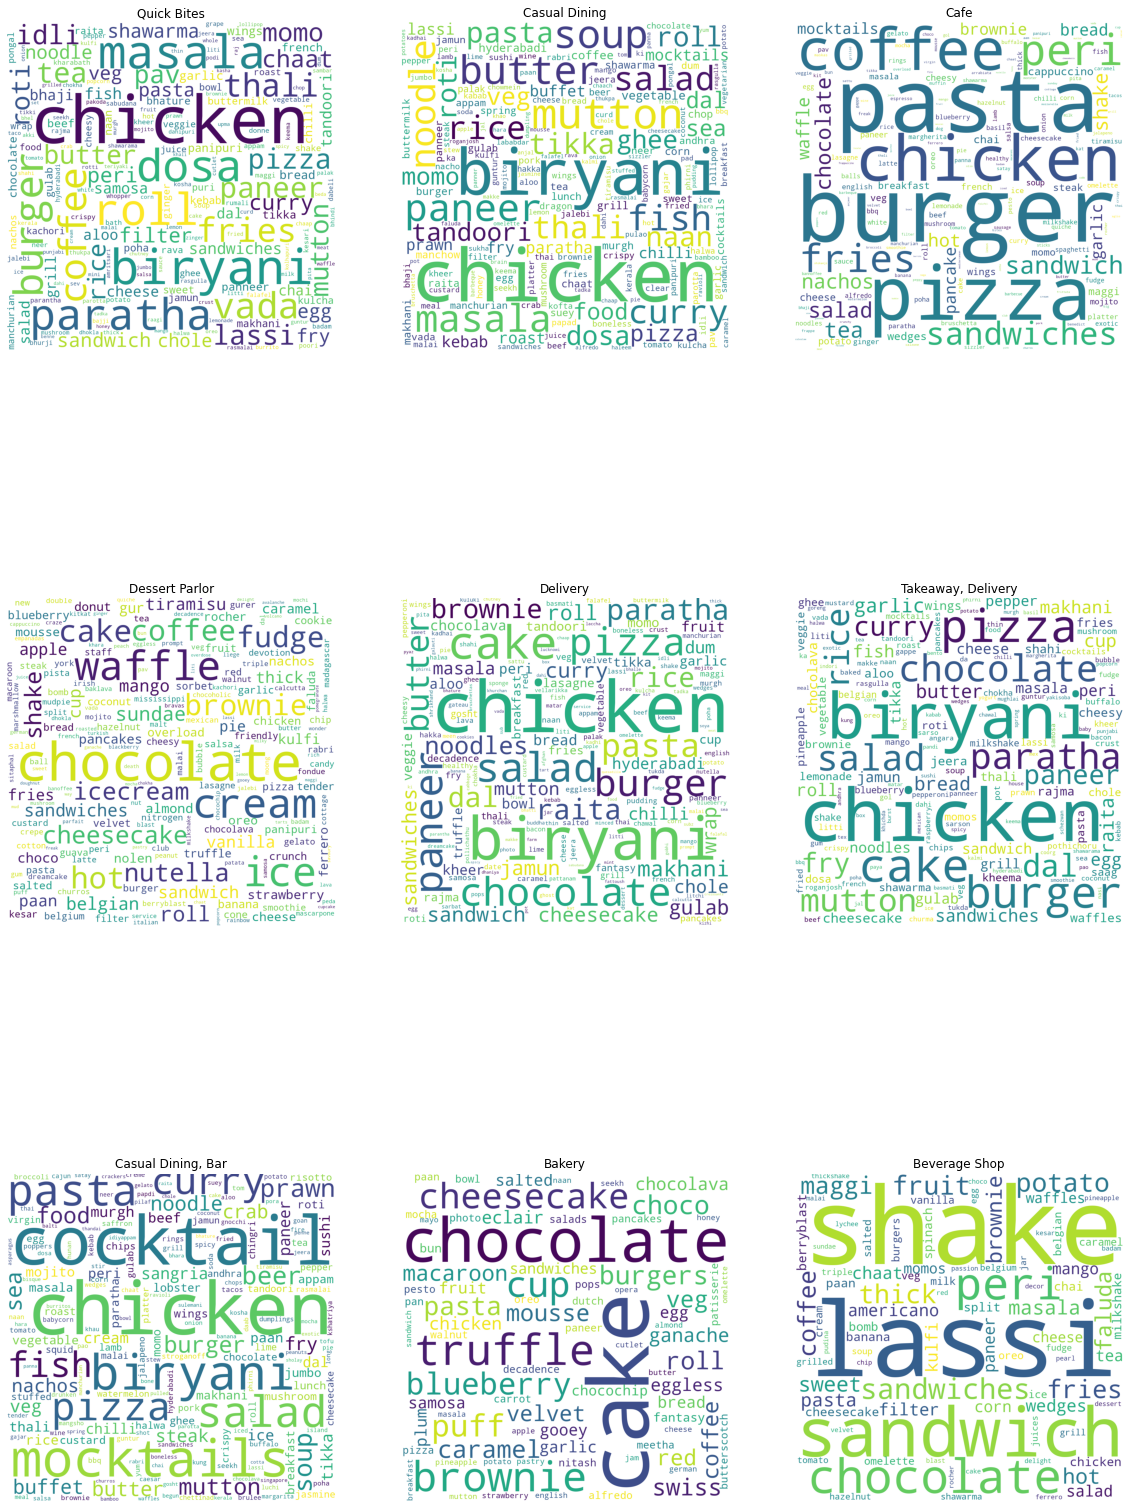

In [68]:

stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

In [69]:
def reviewwords(restaurant):
    dataset=dfupd[dfupd['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off")


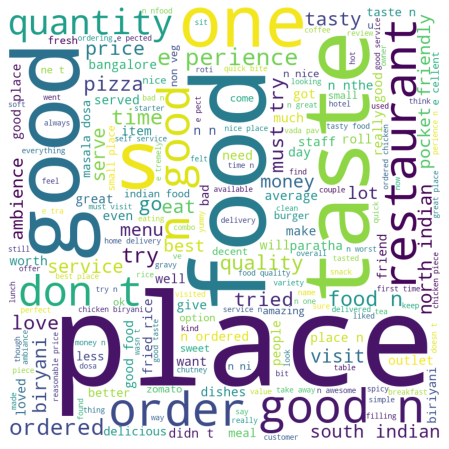

In [70]:
reviewwords('Quick Bites')

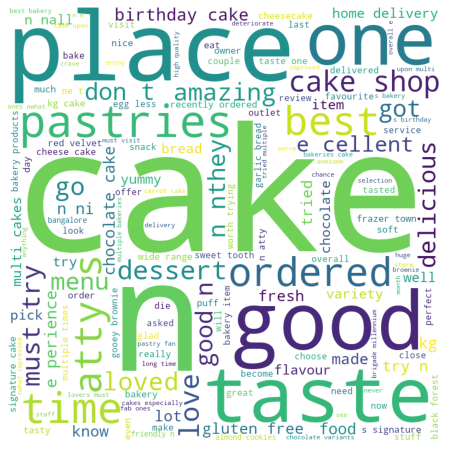

In [71]:
reviewwords('Bakery')

In [72]:
fig=px.bar(x=df['city'].unique(),y=df['city'].value_counts(),labels=dict(x="City Name",y="Total Count"),color_continuous_scale="Agsunset",color=df['city'].unique())
fig.update_layout(title="Location wise counts for Restaurants ",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2, opacity=1)
fig.show()

In [73]:
df2=df.copy()
df2.dropna(how='any',inplace=True)

In [74]:
loc_plt=pd.crosstab(df2['rating'],df2['city'])
fig=px.bar(loc_plt,x=loc_plt.index,y=loc_plt.columns,barmode='stack',opacity=1)
fig.update_layout(title="Location wise Rating",
                  titlefont={'size': 30},
                  template='simple_white'       
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=0.5, opacity=0.8)
fig.show()

In [75]:
fig=px.histogram(df['type'],labels=dict(value='Type'))
fig.update_layout(title="Type of Services",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [76]:
fig=px.histogram(df['cost'],labels=dict(value='Cost Range'),nbins=10)
fig.update_layout(title="Cost of Restaurants",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [77]:
chains=df['name'].value_counts()[:10]
fig=px.bar(y=chains,x=chains.index,labels=dict(x='Name',y='Count'),color_continuous_scale="Agsunset",color=chains.index)
fig.update_layout(title="Most famous restaurant chains",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces( marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [78]:
df2.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
rating          0
dtype: int64

In [79]:
Zom_df.dropna(how='any',inplace=True)

In [80]:
Zom_df.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
rating          0
dtype: int64

# Model

In [81]:
# 

x=Zom_df.iloc[:,[3,4,6,8,9,11,12,14]]
y = Zom_df['rating']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
x.head()

online_order  book_table  votes  location  rest_type  cuisines   cost  \
0             0           0    775         0          0         0  800.0   
1             0           1    787         0          0         1  800.0   
2             0           1    918         0          1         2  800.0   
3             1           1     88         0          2         3  300.0   
4             1           1    166         1          0         4  600.0   

   menu_item  
0          0  
1          0  
2          0  
3          0  
4          0

In [82]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test) 

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09814598633684601

In [83]:
from sklearn.tree import DecisionTreeRegressor


DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9656647131854311

In [84]:
#Preparing Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

r2_score(y_test,y_predict)

0.9739242508124413

In [85]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)


r2_score(y_test,y_predict)

0.9778457699850236

In [86]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree', 'Random Forest','Extra Tree Regressor',],
    'Score' : [reg.score(x_test, y_test), DTree.score(x_test, y_test), RForest.score(x_test, y_test), ETree.score(x_test, y_test)
               ]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3  Extra Tree Regressor  0.977846
2         Random Forest  0.973924
1         Decision Tree  0.965665
0     Linear Regression  0.098146